# Introduction to Data Science
## Fitting mathematical models and using scripts




### Packages

In [3]:
# Import the libraries we will be using

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 10


### Scripts and Data

How can we create data? How can we use a script?

Take a look to the following code:

* We use the folder **_dstools_** that is in the same path as this notebook
* We import the file: **data\_tools**

This file is a   ".py" which has Python commands and functions:

1. Decision_Surface
2. create_data
3. X

After the "import" we can use this 3 functions.

In [6]:

from dstools import data_tools

# Get some data: The create_data() function returns 4 variables:
target_name, variable_names, data, Y = data_tools.create_data()

# Grab the predictors (rows and columns)
X = data_tools.X()


In [18]:
pd.DataFrame(list(zip(X.head(10)['humor'],X.head(10)['number_pets'],Y.head(10))),
             columns=['humor','number_pets','success'])

,humor,number_pets,success
0,18.382066,2.655609,1.0
1,22.605496,1.809010,1.0
2,12.440619,1.744645,1.0
3,20.750973,2.381768,1.0
4,12.046416,2.050800,1.0
5,11.156174,2.913040,1.0
6,13.324954,2.808067,1.0
7,15.464997,1.929565,1.0
8,8.112234,1.935580,1.0
9,16.139585,1.166142,1.0


Let's take a look at our data. We have two features, `humor` and `number_pets`. We will use these to predict whether or not our users are `success`ful.

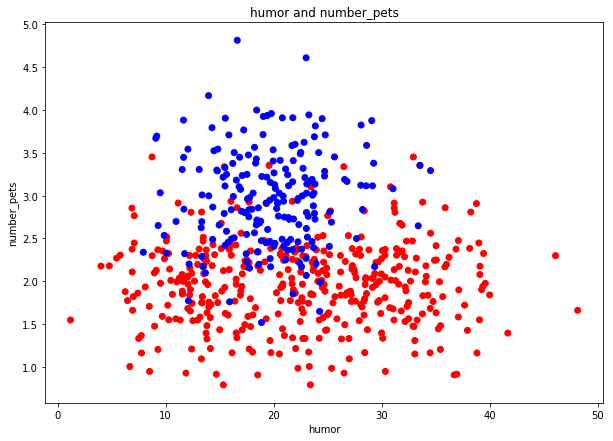

In [19]:
plt.figure(figsize=[10,7])
data_tools.Decision_Surface(X, Y, None, surface=False)

## Decision tree classifiers
We can re-explore the modeling technique we learned last class -- decision tree classifiers.

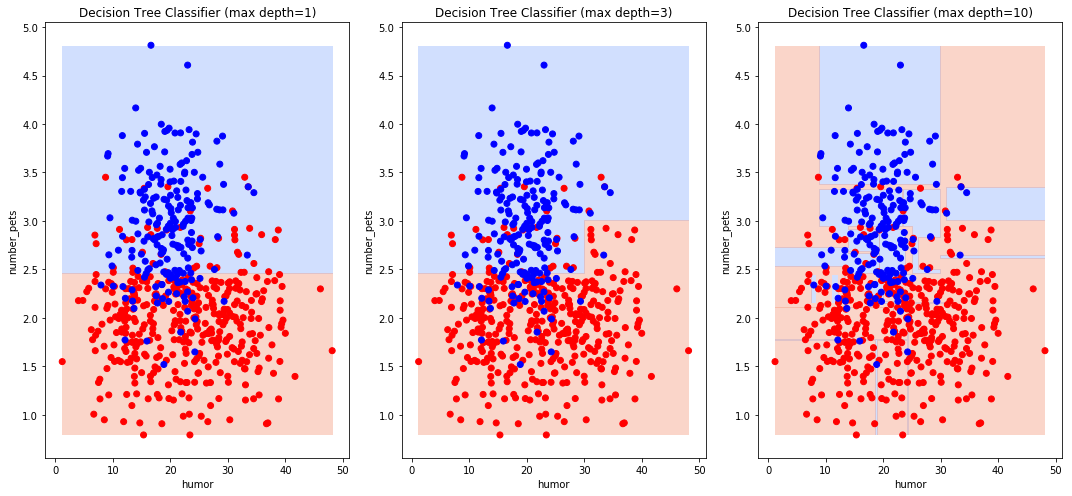

In [21]:
# Settings
depths = [1,3,10] 
show_probabilities = False

plt.figure(figsize=[15,7])

position = 1
for depth in depths:

    # Model
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X, Y) 
    
    # Plot
    plt.subplot(1, len(depths), position)
    position += 1
    data_tools.Decision_Surface(X, Y, model, probabilities=show_probabilities)
    plt.title("Decision Tree Classifier (max depth=" + str(depth) + ")")
    
plt.tight_layout()
plt.show()


## Linear discriminant models

Since you've read about linear models now, let's try building one on this data set. 

Looking at the data above, can you tell where a good linear discriminant would be?

**Logistic regression: ** You can also find this in the sklearn package.

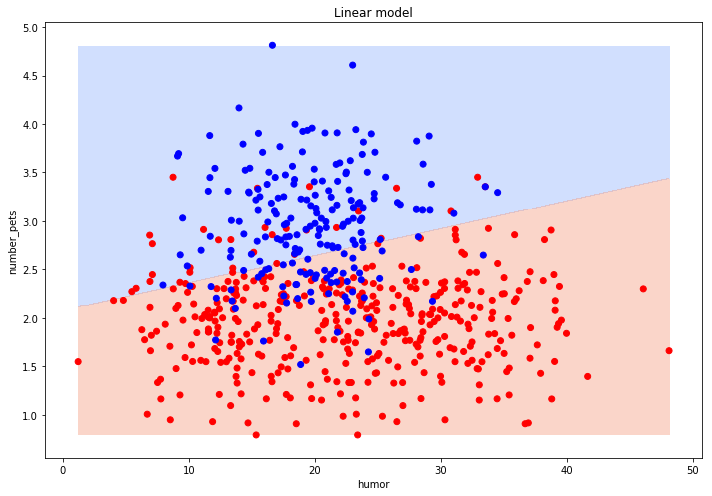

In [24]:

# Settings
show_probabilities = False

# Model
model = LogisticRegression()
model.fit(X, Y)

# Plot
plt.figure(figsize=[10,7])
data_tools.Decision_Surface(X, Y, model, probabilities=show_probabilities)
plt.title("Linear model")
plt.tight_layout()
plt.show()



Ok.  We've talked a lot about the need to estimate probabilities.  Last time we discussed how tree models generate probabilities.  How would we generate probabilities from a linear discriminant?  

Try showing probabilities both for the linear model and the tree classifiers. You can do this by modifying the settings at the top of each code block above **(`show_probabilities = True` or `False`)**.

## Non-linear models

We saw that the tree models could get very complex to fit the data better. One way of doing this was to allow the **tree to grow deeper**. Deeper trees resulted in cutting the decision surface into smaller and smaller pieces.

Can we use the idea of fitting linear models to generate non-linear boundaries with **logistic regression**? We can do this by adding in some non linear terms, such as $humor^2$ or $humor^3$. 

_** Remember: The non-linear consideration is for the variables !! This implementation is independent to the model you are using to predict.**_

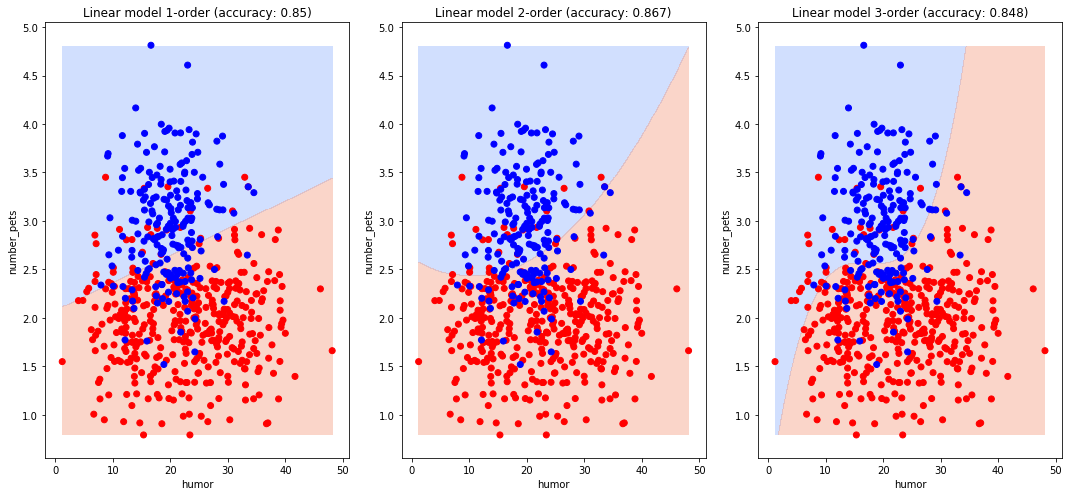

In [28]:
# Settings
max_order = 3      # Maximum of 3 was created in the script:  data_tools.py

show_probabilities = False
plt.figure(figsize=[15,7])

for order in range(1, max_order+1):
    # Get a dataset X_complex with non linear variables
    X_complex = data_tools.X(order)
    
    # Model used to predict
    model = LogisticRegression()
    model.fit(X_complex, Y)
    
    # Plot
    plt.subplot(1, max_order, order)
    data_tools.Decision_Surface(X_complex, Y, model, probabilities=show_probabilities)
    acc_value = metrics.accuracy_score(model.predict(X_complex), Y) 
    plt.title("Linear model " + str(order) + "-order (accuracy: "+ str(round(acc_value,3))+")")
    
plt.tight_layout()
plt.show()

***

How does the complex data look like? 

In [27]:
X_complex.tail()

,humor,number_pets,humor^2,humor^3
595,23.765406,2.793233,564.794540,13422.571776
596,23.042519,3.029087,530.957660,12234.601728
597,20.267528,2.849690,410.772689,8325.346940
598,17.487996,2.547794,305.830009,5348.354020
599,16.790760,3.104059,281.929621,4733.812611


Which model is better in this case?? Look at the **accuracy** of each one.   Accuracy is simply the count of correct decisions divided by the total number of decisions - Data Science for Business. by Foster Provost and Tom Fawcett -

"In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true." 

[More about accuracy measure..](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Of course, we can also look at the **probabilities** on these surfaces. Try it out above!

## Generalization

What we want are models that **generalize** to data that were not used to build them! In othr words, we want to do this model to be able to predict new data! Do we even know how well our models generalize? Why is this important?

<img src="images/generalization.png" alt="Drawing" style="width: 600px;"/>


Let's apply this concept to our data. Now, before we fit out models, we can set aside some data to be used later for testing. The benefit of holding out data is that our model can't simply memorize everything! Let's use sklearn to set aside some data.

In [29]:
# Set randomness so that we all get the same answer
np.random.seed(841)

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80)

Now that we have split our data, let's revisit the tree based classifier we discussed in our last class. We can start by checking how well a model does when it is fit on a "training" set and then used to predict on both the training set as well as our hold out set. Remember, the model has never seen this hold out "test" set before!

In [30]:
# Model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, Y_train)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(model.predict(X_test), Y_test) )

Accuracy on training = 0.8833
Accuracy on test = 0.8750


The results on the test set were worse. Why is this? Can it ever do beter?

If you remember, last week we saw that as we let our tree get deeper and deeper, we eventually achieved 100% accuracy. Can we do this on the test data? What happens as our tree gets more and more complicated?

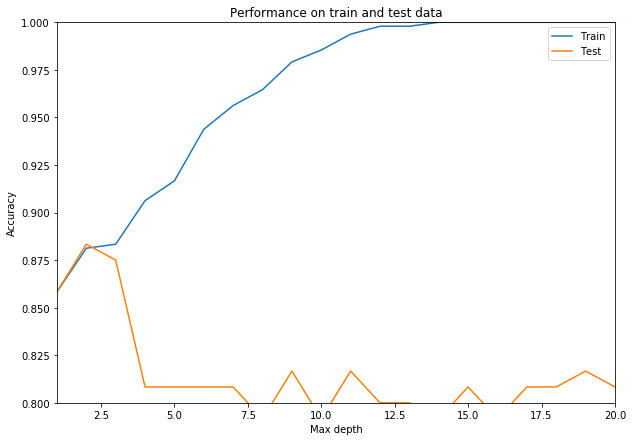

In [31]:
accuracies_train = []
accuracies_test = []
depths = range(1, 21)

plt.figure(figsize=[10,7])

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(X_train, Y_train)
    
    accuracies_train.append(metrics.accuracy_score(model.predict(X_train), Y_train))
    accuracies_test.append(metrics.accuracy_score(model.predict(X_test), Y_test))

plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Performance on train and test data")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([0.80, 1.0])
plt.xlim([1,20])
plt.legend()
plt.show()

## Cross validation

Above, we made a single train/test split. We set aside 20% of our data and *never* used it for training. We also never used the 80% of the data set aside for training to test generalizability. How can we make better use of our data so that we can utilize it more fully when training and testing?

Instead of only making the split once, let's use cross validation so that every record can contribute to training as well as testing in some way.


<img src="images/cross.png" alt="Drawing" style="width: 600px;"/>


In [32]:
# Model
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train, Y_train)

print ( "Cross validation accuracy on training = %.3f" % np.mean(cross_val_score(model, X, Y)) )

Cross validation accuracy on training = 0.847


We can add this to our plot from above.

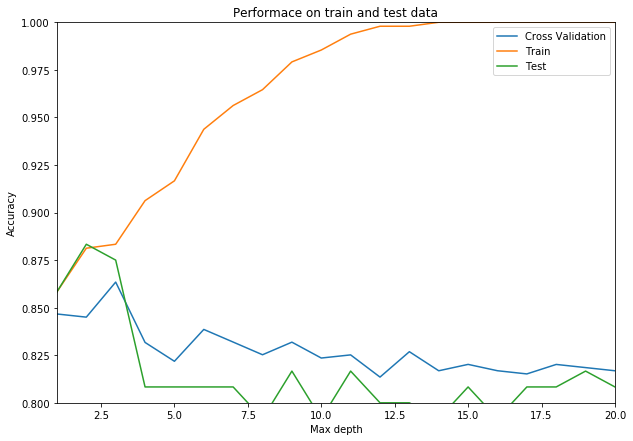

In [33]:
accuracies_cross_validation = []
depths = range(1, 21)

plt.figure(figsize=[10,7])

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    
    accuracies_cross_validation.append(np.mean(cross_val_score(model, X, Y)))

plt.plot(depths, accuracies_cross_validation, label="Cross Validation")
plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Performace on train and test data")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([0.8, 1.0])
plt.xlim([1,20])
plt.legend()
plt.show()